In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Basic Data checks and Data cleaning¶

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:

data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


<AxesSubplot:>

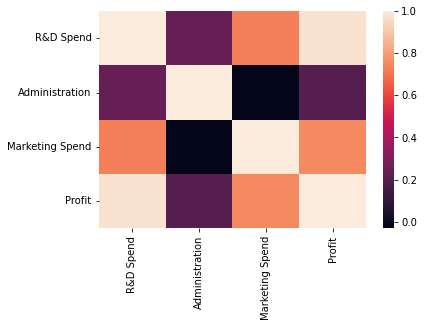

In [7]:
cor= data.corr()
sns.heatmap(cor)

In [8]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
data.drop(columns= ['State'], inplace=True)

In [10]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


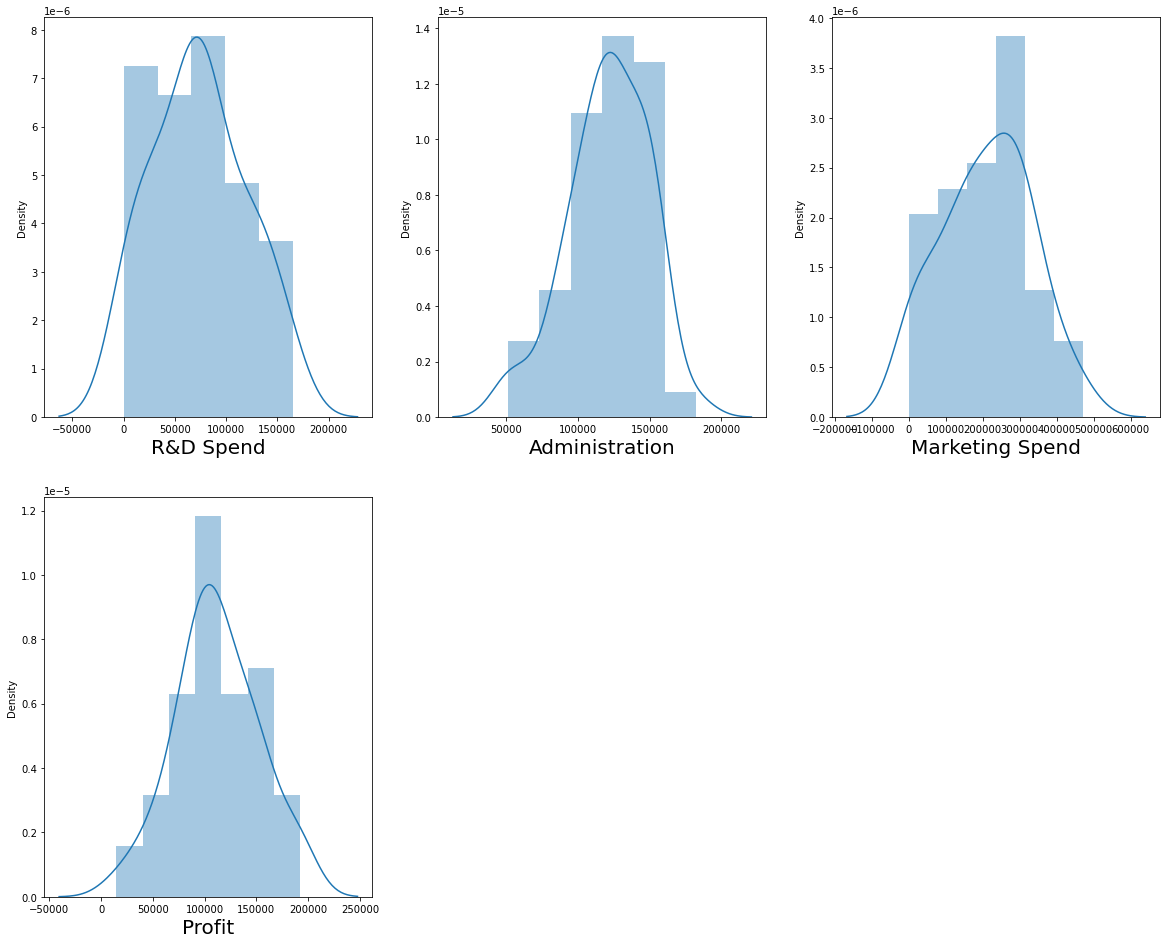

In [13]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [14]:
### Split X and Y
X = data.drop(columns = ['Profit'])
Y = data['Profit']

In [15]:
## scaling the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [16]:
X_scaled


array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [17]:
## splitting the training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,random_state=42)

In [18]:
## Error calculation for regression task
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 17514.41515782093
RMSE value for k=  2 is: 15330.01623437321
RMSE value for k=  3 is: 17695.930980760113
RMSE value for k=  4 is: 18954.895320733656
RMSE value for k=  5 is: 14471.65996753232
RMSE value for k=  6 is: 15537.272446725849
RMSE value for k=  7 is: 16617.45560893649
RMSE value for k=  8 is: 18288.110131396
RMSE value for k=  9 is: 18512.28502387009
RMSE value for k=  10 is: 17805.592562803733
RMSE value for k=  11 is: 17949.660566006994
RMSE value for k=  12 is: 18774.108615284258
RMSE value for k=  13 is: 18704.04635070637
RMSE value for k=  14 is: 18989.315931031957
RMSE value for k=  15 is: 19172.753569970962
RMSE value for k=  16 is: 19380.432739649663
RMSE value for k=  17 is: 19801.488718207595
RMSE value for k=  18 is: 19481.77599905554
RMSE value for k=  19 is: 20176.086076687614
RMSE value for k=  20 is: 20674.20957579782


In [42]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,Y_train)# Predict 
Y_pred = knn.predict(X_test)

In [46]:
X_test.shape

(13, 3)

In [48]:
Y_pred.shape

(13,)

In [43]:
Y_pred

array([120568.428,  84756.962,  84965.668,  54088.07 , 135774.594,
        68337.458, 108406.34 ,  92829.82 ,  82337.484, 104618.684,
       127530.214, 164992.572,  84756.962])

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
R2Score =  r2_score(Y_test,Y_pred)
print(R2Score)
print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("MAE: ", mean_absolute_error(Y_test, Y_pred))


0.8051391844032325
MSE:  209428942.21587753
MAE:  12100.540923076924


In [49]:
test_adjusted_r2 = 1-(1-0.80)*(13-1)/(13-3-1)
test_adjusted_r2

0.7333333333333334